In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load csv , xlsx and tsv file 

In [71]:
data = pd.read_csv('airbnb_price.csv')
datax = pd.read_excel('airbnb_room_type.xlsx',engine = 'openpyxl')
datat = pd.read_csv('airbnb_last_review.tsv',sep='\t',header=0)


In [72]:
data.head()


,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [73]:
datax.head()


,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [74]:
datat.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [ ]:
#filled missings ”or null values from the dataset with zero

In [55]:
data.fillna (0,inplace=True)

In [59]:
datax

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,No.2 with queen size bed,PRIVATE ROOM
25206,36438336,Seas The Moment,Private room
25207,36442252,1B-1B apartment near by Metro,Entire home/apt


In [111]:
sum(data.duplicated())

0

In [112]:
Output_df = pd.merge(data, datax, on='listing_id',
                     how='inner')

In [113]:
Output_df1= pd.merge(Output_df, datat, on='listing_id',
                     how='inner')

In [194]:
Output_df1

,listing_id,price,nbhood_full,description,room_type,host_name,last_review,borough
0,2595,225,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt,Jennifer,May 21 2019,Manhattan
1,3831,89,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,July 05 2019,Brooklyn
2,5099,200,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,June 22 2019,Manhattan
3,5178,79,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019,Manhattan
4,5238,150,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,June 09 2019,Manhattan
...,...,...,...,...,...,...,...,...
25204,36425863,129,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,private room,Rusaa,July 07 2019,Manhattan
25205,36427429,45,"Queens, Flushing",No.2 with queen size bed,private room,H Ai,July 07 2019,Queens
25206,36438336,235,"Staten Island, Great Kills",Seas The Moment,private room,Ben,July 07 2019,Staten
25207,36442252,100,"Bronx, Mott Haven",1B-1B apartment near by Metro,entire home/apt,Blaine,July 07 2019,Bronx


In [ ]:
# merged csv,tsv,xlsx data in to one csv file and save it to current path 
#Output_df1.to_csv('airbnb_merged.csv')

In [145]:
Output_df1.isnull()
Output_df1.isnull().sum()
Output_df1.fillna (0,inplace=True)
Output_df1.isnull().sum()
Output_df1.duplicated()
Output_df1.count(axis='index')

listing_id     25209
price          25209
nbhood_full    25209
description    25209
room_type      25209
host_name      25209
last_review    25209
dtype: int64

In [210]:
room_types = Output_df1.groupby('room_type').count().reset_index()


In [211]:
room_types

,room_type,listing_id,price,nbhood_full,description,host_name,last_review,borough
0,entire home/apt,13266,13266,13266,13266,13266,13266,13266
1,private room,11356,11356,11356,11356,11356,11356,11356
2,shared room,587,587,587,587,587,587,587


In [212]:
# Normalize Casing 

In [217]:
Output_df1['room_type'] = Output_df1['room_type'].str.lower()
Output_df1["room_type"] = Output_df1["room_type"].astype("category")
room_frequencies = Output_df1["room_type"].value_counts()


In [220]:
room_types = Output_df1.groupby('room_type')['host_name'].count().reset_index()
room_types

,room_type,host_name
0,entire home/apt,13266
1,private room,11356
2,shared room,587


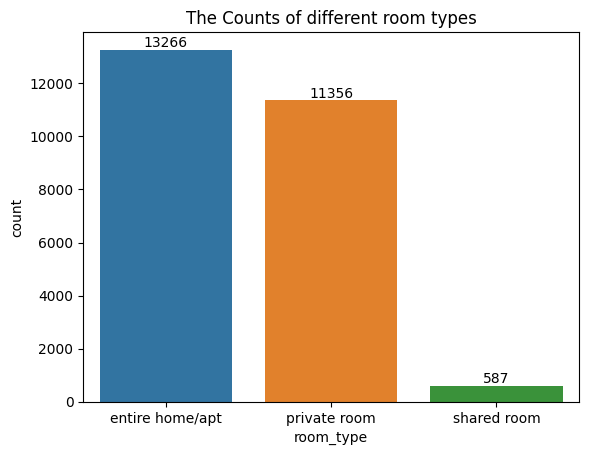

In [219]:
ax = sns.countplot(data=Output_df1, x="room_type", );
ax.bar_label(ax.containers[0])
plt.title("The Counts of different room types");

In [153]:
Output_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  int32 
 2   nbhood_full  25209 non-null  object
 3   description  25209 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25209 non-null  object
 6   last_review  25209 non-null  object
dtypes: int32(1), int64(1), object(5)
memory usage: 1.3+ MB


In [154]:
# remove dollars string and convert object to int in price column 

In [155]:
Output_df1['price'] = Output_df1['price'].str.replace('dollars', '')
Output_df1['price'] = Output_df1['price'].astype(int)

AttributeError: Can only use .str accessor with string values!

In [156]:
Output_df1

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt,Jennifer,May 21 2019
1,3831,89,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,July 05 2019
2,5099,200,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,June 22 2019
3,5178,79,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,June 09 2019
...,...,...,...,...,...,...,...
25204,36425863,129,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,private room,Rusaa,July 07 2019
25205,36427429,45,"Queens, Flushing",No.2 with queen size bed,private room,H Ai,July 07 2019
25206,36438336,235,"Staten Island, Great Kills",Seas The Moment,private room,Ben,July 07 2019
25207,36442252,100,"Bronx, Mott Haven",1B-1B apartment near by Metro,entire home/apt,Blaine,July 07 2019


In [160]:
Output_df1.price.mean()

141.7779364512674

In [187]:
# Extract information from the nbhood_full column and store as a new column, borough
Output_df1["borough"] = Output_df1["nbhood_full"].str.partition()[0].str.rstrip(",")
boroughs = Output_df1.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
boroughs = boroughs.round(2).sort_values("mean", ascending=False)

# Print boroughs
print(boroughs)

               sum    mean  median  count
borough                                  
Manhattan  1899255  184.00   149.0  10322
Brooklyn   1275855  121.90    95.0  10466
Queens      320765   92.81    70.0   3456
Staten       22974   86.04    71.0    267
Bronx        55231   79.13    65.0    698


In [188]:
Output_df1

,listing_id,price,nbhood_full,description,room_type,host_name,last_review,borough
0,2595,225,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt,Jennifer,May 21 2019,Manhattan
1,3831,89,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,July 05 2019,Brooklyn
2,5099,200,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,June 22 2019,Manhattan
3,5178,79,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019,Manhattan
4,5238,150,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,June 09 2019,Manhattan
...,...,...,...,...,...,...,...,...
25204,36425863,129,"Manhattan, Upper East Side",Lovely Privet Bedroom with Privet Restroom,private room,Rusaa,July 07 2019,Manhattan
25205,36427429,45,"Queens, Flushing",No.2 with queen size bed,private room,H Ai,July 07 2019,Queens
25206,36438336,235,"Staten Island, Great Kills",Seas The Moment,private room,Ben,July 07 2019,Staten
25207,36442252,100,"Bronx, Mott Haven",1B-1B apartment near by Metro,entire home/apt,Blaine,July 07 2019,Bronx


In [189]:
#label	price
#Budget	$0-69
#Average	$70-175
#Expensive	$176-350
#Extravagant	> $350

In [190]:

range = [0,69, 175, 350, np.inf]
labels = ["Budget", "Average", "Expensive", "Extravagant"]

In [191]:
remapping_data = Output_df1.copy()
remapping_data['price_range'] = pd.cut(remapping_data['price'],
                                         bins=range,
                                         labels=labels)
  
prices_by_borough = remapping_data.groupby(["borough","price_range"])["price_range"].count()
print(prices_by_borough)

borough    price_range
Bronx      Budget          381
           Average         286
           Expensive        25
           Extravagant       5
Brooklyn   Budget         3201
           Average        5534
           Expensive      1466
           Extravagant     259
Manhattan  Budget         1150
           Average        5289
           Expensive      3073
           Extravagant     810
Queens     Budget         1632
           Average        1505
           Expensive       291
           Extravagant      28
Staten     Budget          124
           Average         123
           Expensive        20
           Extravagant       0
Name: price_range, dtype: int64
